# Example: constructing the QSP protocol for Grover's Search/Amplitude Amplification

We can use QSP/QSVT to carry out amplitude amplification (see [arXiv:2105.02859](https://arxiv.org/abs/2105.02859), Section III). The idea is to approximate the function
$$f(x) = (1 - \delta) \text{erf}(\kappa x)$$
using a QSP polynomial $P(x)$. If the algorithm $\mathcal{A}$ to amplify has success amplitude $\sigma$, then $\sigma$ is the singular value of the block-encoded unitary, and we want to apply an odd-degree singular value transformation $P$ satisfying $P(\sigma) \ge 1 - \delta$. Approximating $f(x)$ gives such guarantee (by choosing sufficiently high $\kappa$). Here we show how to retrieve a QSP protocol for such $P$.

In [1]:
import scipy as sp

from nlft_qsp.poly import ChebyshevTExpansion
from nlft_qsp.qsp import chebqsp_approximate
from nlft_qsp.plot import plot_chebyshev

NumpyBackend -- chosen dtypes: complex128, float64


In [2]:
K = 10
delta = 0.3

def f(x):
    return (1 - delta) * sp.special.erf(K*x)

In [ ]:
pf = chebqsp_approximate(f, deg=21)

Pl, Ql = pf.polynomials(mode='laurent')

Here `deg` is the degree of the approximating polynomial. To ensure $P(\sigma) \ge 1 - \delta$ we need to choose $d = \Theta(\frac{1}{\sigma} \log \frac{1}{\delta})$.

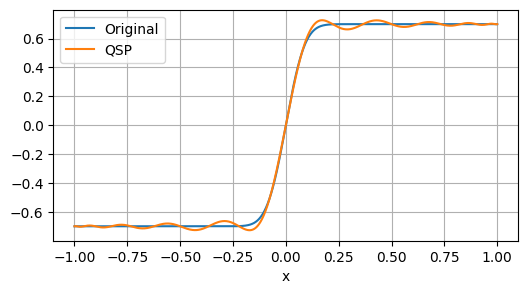

In [ ]:
plot_chebyshev({ "Original": f,
                 "QSP": ChebyshevTExpansion.from_laurent_polynomial(Pl)
                })